In [43]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import helper
import os
from torch import nn
dirpath = os.getcwd()

# download the data
transform = transforms.Compose([transforms.Resize(255),
                               transforms.CenterCrop(224),
                               transforms.ToTensor()])
data_dir = 'data/Cat_dog_data'
i = 0
dataset = datasets.ImageFolder(data_dir, transform = transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size = 32, shuffle = True)

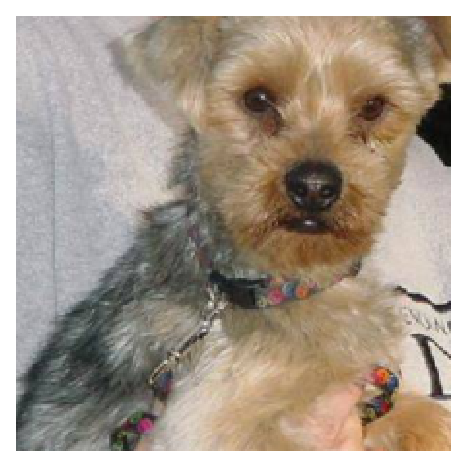

In [36]:
images, labels = next(iter(dataloader))
helper.imshow(images[0], normalize = False)

## Data Augmentation

torch.Size([32, 3, 224, 224])


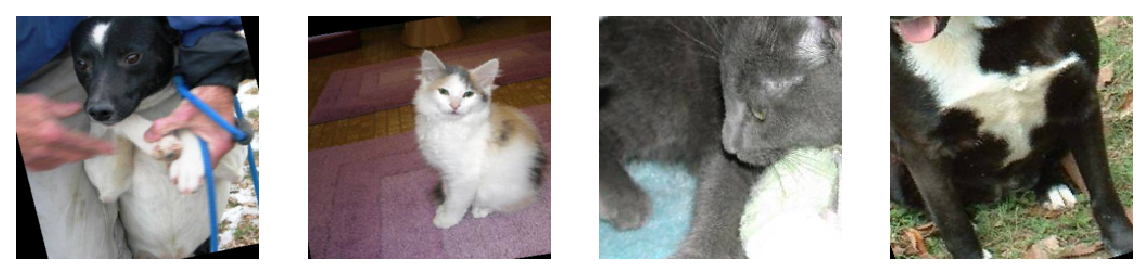

In [56]:
# To randomly rotate, scale and crop
# in training data you want to augment the data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                      transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor()])
test_transforms = transforms.Compose([transforms.Reisize(255),#convert in square 255
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor()])

train_data = datasets.ImageFolder(data_dir + '/train', transform = train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test1', transform = test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size = 32)
testloader = torch.utils.data.DataLoader(test_data, batch_size = 32)

data_iter = iter(testloader)
images, labels = next(data_iter)
fig, axes = plt.subplots(figsize = (10,4), ncols = 4)
for i in range(4):
    ax = axes[i]
    helper.imshow(images[i], ax = ax, normalize = False)
print(images.shape)

In [ ]:
# Classification with fully connected
from torch import nn
class Clasifier(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.hid1 = nn.Linear(150528, 256)
        self.hid2 = nn.Linear(256, 128)
        self.hid3 = nn.Linear(128, 64)
        self.output = nn.LogSoftmax(dim = 1)
        
        # dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p = 0.2)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim = 1)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.dropout(self.relu(self.hid1(x)))
        x = self.dropout(self.relu(self.hid2(x)))
        x = self.dropout(self.relu(self.hid3(x)))
        x = self.softmax(self.output(x))
        
        return x

model = Clasifier()
# train model
from torch import optim
epoch = 8
train_error = 0

optimizer = optim.SGD(model.parameters(), lr = 0.003)
criterion = nn.NLLLoss()

for i in range(epoch):
    train_error = 0
    for images, labels in trainloader:
        optimizer.zero_grad() #restart
        
        output = model(images) # forward pass
        loss = criterion(output, labels) # calculate error
        loss.backward() # back pass , get the gradients
        
        optimizer.step() # update weight
        
        train_error += loss.item()
    else:
        print(f'error sum {train_error/len(trainloader)}')


error sum 0.9514716415835158
error sum 0.8251819496073991
error sum 0.8393458645895618
error sum 0.8361280725320892
error sum 0.8430769247815127
error sum 0.8374531543087167
error sum 0.8354100907778801
